## LEGO Data Analysis- Rebrickable

 ###### This dataset is from https://rebrickable.com/downloads/

### LEGO Data Model


### 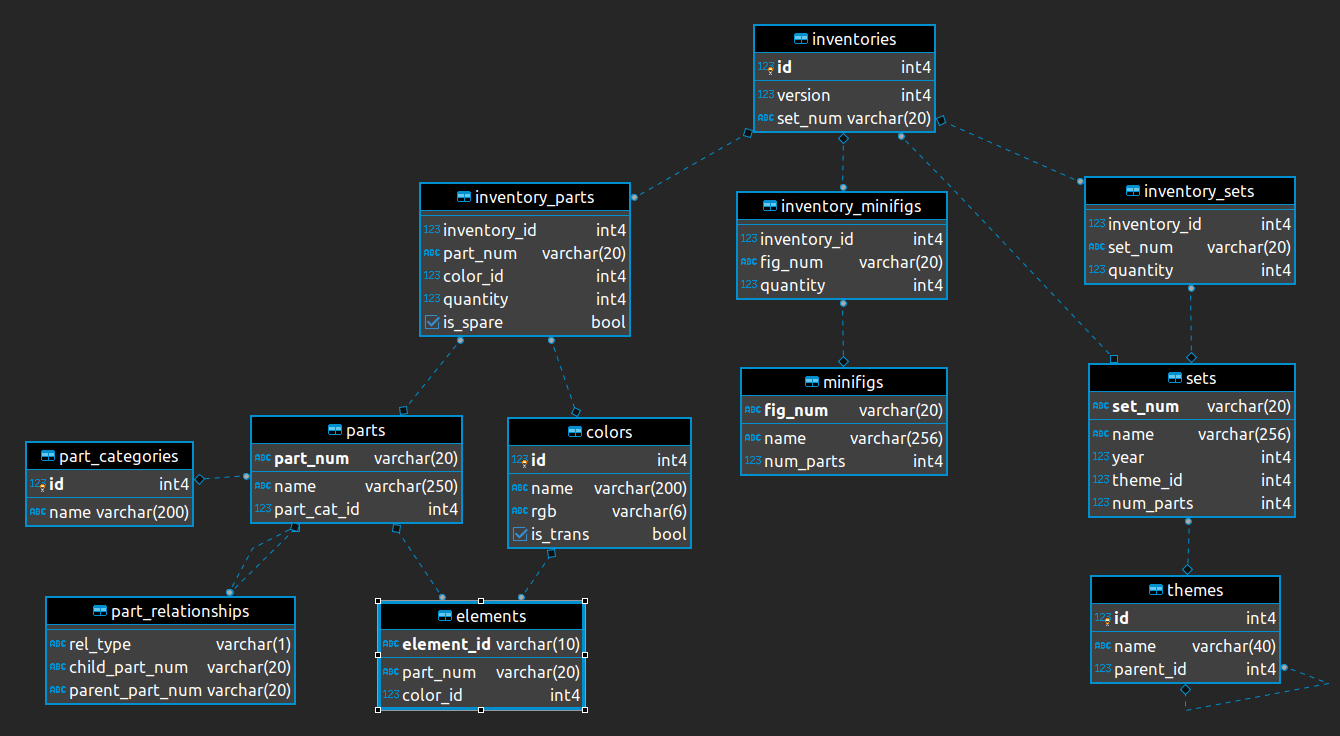

#### importing all libraries

In [3]:
import pandas as pd
import numpy as np

### Getting data

In [4]:
sets=pd.read_csv("datasource/sets.csv")
sets

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1979,67,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
19420,XWING-1,Mini X-Wing Fighter,2019,158,60
19421,XWING-2,X-Wing Trench Run,2019,158,52
19422,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413
19423,YTERRIER-1,Yorkshire Terrier,2018,598,0


In [5]:
themes=pd.read_csv("datasource/themes.csv")
themes

,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0
...,...,...,...
440,716,Modulex,NaN
441,717,Speed Racer,NaN
442,718,Series 22 Minifigures,535.0
443,719,BrickLink Designer Program,NaN


In [6]:
colors=pd.read_csv("datasource/colors.csv")
colors

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
211,1085,Two-tone Silver,737271,f
212,1086,Pearl Lime,6A7944,f
213,1087,Duplo Pink,FF879C,f
214,1088,Medium Brown,755945,f


In [7]:
inv_parts=pd.read_csv("datasource/inventory_parts.csv")
inv_parts

,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,stickerupn0077,9999,1,f
3,1,upn0342,0,1,f
4,1,upn0350,25,1,f
...,...,...,...,...,...
1022550,138660,99021,72,2,f
1022551,138660,99207,4,2,f
1022552,138660,99207,71,6,f
1022553,138660,99780,15,8,f


In [8]:
sets.isnull()
themes.isnull().sum()

id             0
name           0
parent_id    138
dtype: int64

### MERGE DATA

### Joining two datasets 

In [9]:
merge=pd.merge(sets,themes, how='left', left_on='theme_id', right_on='id', suffixes=('_sets','_themes'))
merge

,set_num,name_sets,year,theme_id,num_parts,id,name_themes,parent_id
0,001-1,Gears,1965,1,43,1,Technic,NaN
1,0011-2,Town Mini-Figures,1979,67,12,67,Classic Town,50.0
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,199,Lion Knights,186.0
3,0012-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0
4,0013-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0
...,...,...,...,...,...,...,...,...
19420,XWING-1,Mini X-Wing Fighter,2019,158,60,158,Star Wars,NaN
19421,XWING-2,X-Wing Trench Run,2019,158,52,158,Star Wars,NaN
19422,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413,158,Star Wars,NaN
19423,YTERRIER-1,Yorkshire Terrier,2018,598,0,598,Promotional,NaN


In [10]:
merge.head(10)

,set_num,name_sets,year,theme_id,num_parts,id,name_themes,parent_id
0,001-1,Gears,1965,1,43,1,Technic,NaN
1,0011-2,Town Mini-Figures,1979,67,12,67,Classic Town,50.0
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,199,Lion Knights,186.0
3,0012-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0
4,0013-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0
5,0014-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0
6,0015-1,Space Mini-Figures,1979,143,18,143,Supplemental,126.0
7,0016-1,Castle Mini Figures,1979,186,15,186,Castle,NaN
8,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,1,Technic,NaN
9,002253963-1,Legend of Chima: Corbeaux et Gorilles,2013,497,4,497,Books,NaN


In [11]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19425 entries, 0 to 19424
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   set_num      19425 non-null  object 
 1   name_sets    19425 non-null  object 
 2   year         19425 non-null  int64  
 3   theme_id     19425 non-null  int64  
 4   num_parts    19425 non-null  int64  
 5   id           19425 non-null  int64  
 6   name_themes  19425 non-null  object 
 7   parent_id    8900 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 1.3+ MB


In [12]:
merge.columns

Index(['set_num', 'name_sets', 'year', 'theme_id', 'num_parts', 'id',
       'name_themes', 'parent_id'],
      dtype='object')

### Let's dive more

#### 1: What's the total number of parts per theme

In [13]:
Num_Parts_Per_Theme=merge.groupby('name_themes').sum().reset_index()
Num_Parts_Per_Theme[['name_themes','num_parts']].sort_values('num_parts', ascending=False)

,name_themes,num_parts
303,Technic,228199
292,Star Wars,224007
66,Creator Expert,132082
64,Creator,102388
209,Ninjago,96712
...,...,...
16,Aquazone,26
355,Zooters,25
229,Powered Up,19
340,Value Packs,1


#### 2: What is the total number of parts per year?

In [14]:
Num_Parts_Per_Year=merge.groupby('year').sum().reset_index()
Num_Parts_Per_Year[['year','num_parts']].sort_values('num_parts', ascending=False)

,year,num_parts
70,2021,264831
69,2020,211981
68,2019,191526
66,2017,178636
67,2018,171910
...,...,...
5,1956,246
3,1954,117
8,1959,65
2,1953,50


#### 3:How many sets were created in each Century in the dataset?

#### We have to add derived column in merge dataset

In [15]:
unique_year=merge['year'].unique()
unique_year.sort()
unique_year

array([1949, 1950, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [16]:
merge['year']>2000
merge['Century']=np.where(merge['year']>2000, '21st Century','20th Century')
merge

,set_num,name_sets,year,theme_id,num_parts,id,name_themes,parent_id,Century
0,001-1,Gears,1965,1,43,1,Technic,NaN,20th Century
1,0011-2,Town Mini-Figures,1979,67,12,67,Classic Town,50.0,20th Century
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,199,Lion Knights,186.0,20th Century
3,0012-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0,20th Century
4,0013-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0,20th Century
...,...,...,...,...,...,...,...,...,...
19420,XWING-1,Mini X-Wing Fighter,2019,158,60,158,Star Wars,NaN,21st Century
19421,XWING-2,X-Wing Trench Run,2019,158,52,158,Star Wars,NaN,21st Century
19422,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413,158,Star Wars,NaN,21st Century
19423,YTERRIER-1,Yorkshire Terrier,2018,598,0,598,Promotional,NaN,21st Century


In [17]:
Num_Sets_Century=merge.groupby('Century').count().reset_index()
Num_Sets_Century[['Century','set_num']]

,Century,set_num
0,20th Century,4862
1,21st Century,14563


#### 4:What percentage of sets ever released in the 21st Century were Trains Themed?

In [35]:
Century_21_data=merge[merge['Century']=='21st Century']
#train=Century_21_data[Century_21_data['name_themes']=='Trains']
train=Century_21_data[Century_21_data['name_themes'].str.contains('Train')]
train.shape[0]


64

In [34]:
Century_21_data.shape[0]

14563

In [36]:
train.shape[0]/Century_21_data.shape[0] *100

0.4394698894458559

### Less than 1 % Trains themed sets were release in 21st century

#### 5:What percentage of sets ever released in the 21st Century were Disney Themed?

In [77]:
Disney=Century_21_data[Century_21_data['name_themes'].str.contains('Disney')]
Disney
                       

,set_num,name_sets,year,theme_id,num_parts,id,name_themes,parent_id,Century
420,10509-1,Dusty and Chug,2013,627,16,627,Disney Planes,504.0,21st Century
422,10510-1,Ripslinger's Air Race,2013,627,40,627,Disney Planes,504.0,21st Century
423,10511-1,Skipper's Flight School,2013,627,53,627,Disney Planes,504.0,21st Century
427,10515-1,Ariel's Undersea Castle,2013,640,39,640,Disney Princess,504.0,21st Century
428,10516-1,Ariel's Magical Boat Ride,2012,640,30,640,Disney Princess,504.0,21st Century
...,...,...,...,...,...,...,...,...,...
18368,BELLE-1,Belle's Castle,2016,579,72,579,Disney Princess,NaN,21st Century
18421,CINDERELLASCASTLE-1,Cinderella’s Castle,2017,608,102,608,Disney,NaN,21st Century
19230,ROSE-1,The Beast's Enchanted Rose,2017,608,0,608,Disney,NaN,21st Century
19329,TRUCOGSWORTH-1,Cogsworth,2016,608,48,608,Disney,NaN,21st Century


In [38]:
Disney.shape[0]

184

In [39]:
Disney.shape[0]/Century_21_data.shape[0] *100

1.2634759321568358

### Disney themed sets released over 1 % in 21st Century

#### 6:What is the popular theme by year in terms of sets released in the 21st Century?

In [48]:
popular_theme_year=Century_21_data.groupby(['year','name_themes']).count().reset_index()
popular_theme_year=popular_theme_year[['year','name_themes','set_num']].sort_values('set_num',ascending=False)
popular_theme_year.drop_duplicates('year').sort_values('year',ascending=False)

,year,name_themes,set_num
1373,2022,City,49
1327,2021,Gear,215
1252,2020,Gear,151
1181,2019,Gear,173
1104,2018,Gear,116
1035,2017,Gear,155
953,2016,Gear,97
866,2015,Gear,94
820,2014,Technic,116
705,2013,Gear,97


#### 7:What is the most produced color of lego ever in terms of quantity of parts?

#### Join 2 dataframe


#### REname column name to color_name to easy understand

In [60]:
             
color_inventory=pd.merge(inv_parts,colors, how='left', left_on='inventory_id', right_on='id')
color_inventory.rename(columns={'name':'color_name'},inplace=True)
color_inventory

,inventory_id,part_num,color_id,quantity,is_spare,id,color_name,rgb,is_trans
0,1,48379c01,72,1,f,1.0,Blue,0055BF,f
1,1,48395,7,1,f,1.0,Blue,0055BF,f
2,1,stickerupn0077,9999,1,f,1.0,Blue,0055BF,f
3,1,upn0342,0,1,f,1.0,Blue,0055BF,f
4,1,upn0350,25,1,f,1.0,Blue,0055BF,f
...,...,...,...,...,...,...,...,...,...
1022550,138660,99021,72,2,f,NaN,NaN,NaN,NaN
1022551,138660,99207,4,2,f,NaN,NaN,NaN,NaN
1022552,138660,99207,71,6,f,NaN,NaN,NaN,NaN
1022553,138660,99780,15,8,f,NaN,NaN,NaN,NaN


In [86]:
popular_color=color_inventory.groupby('color_name').sum().reset_index()
popular_color=popular_color[['color_name','quantity']].sort_values('quantity',ascending=False)
#black=popular_color[popular_color['color_name'].str.contains('Silver')]
popular_color.head(50)

,color_name,quantity
101,Speckle DBGray-Silver,5962
93,Royal Blue,947
13,Dark Nougat,901
119,Two-tone Copper,832
44,Medium Lime,696
95,Sand Blue,585
20,Duplo Pink,525
69,Modulex Ochre Yellow,500
40,Medium Blue,480
70,Modulex Olive Green,467
